# Wprowadzenie

Zbiór danych obejmuje takie zmienne jak liczba ciąż, w których pacjentka była, jej BMI, poziom ciśnienia krwi, poziom insuliny, wiek, zmienna outcome, która ma na celu przewidywać czy pacjentka ma cukrzycę oraz inne zmienne znajdujące się w pliku csv.

Badane osoby w tym konkretnym zbiorze danych obejmują kobiety w wieku co najmniej 21 lat. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset_zadanie.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122,90,51,220,49.7,0.325,31,1
1,1,163,72,0,0,39.0,1.222,33,1
2,1,151,60,0,0,26.1,0.179,22,0
3,0,125,96,0,0,22.5,0.262,21,0
4,1,81,72,18,40,26.6,0.283,24,0


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
744,1,0,48,20,0,24.7,0.140,22,0
745,7,62,78,0,0,32.6,0.391,41,0
746,5,95,72,33,0,37.7,0.370,27,0
747,0,131,0,0,0,43.2,0.270,26,1
748,2,112,66,22,0,25.0,0.307,24,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               749 non-null    int64  
 1   Glucose                   749 non-null    int64  
 2   BloodPressure             749 non-null    int64  
 3   SkinThickness             749 non-null    int64  
 4   Insulin                   749 non-null    int64  
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  749 non-null    float64
 7   Age                       749 non-null    int64  
 8   Outcome                   749 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.8 KB


## Data Cleaning & EDA

In [7]:
df.rename(columns={
    'BloodPressure': 'Blood Pressure',
    'SkinThickness': 'Skin Thickness',
    'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'
}, inplace=True)

### Pregnancies

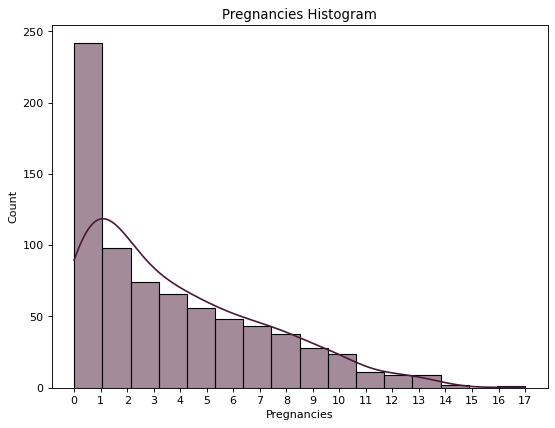

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Pregnancies', kde=True, color="#4a1936")
plt.xticks(range(18))
plt.title('Pregnancies Histogram')
plt.show()

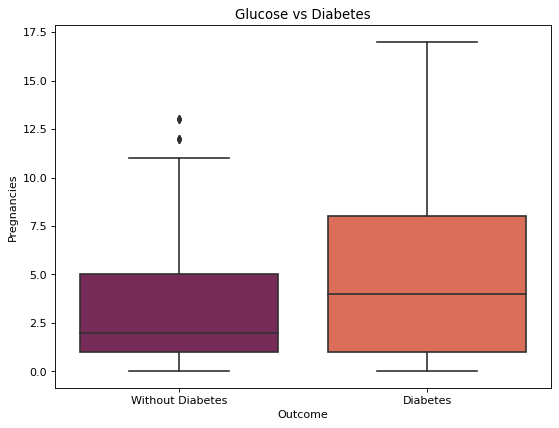

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Pregnancies', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Pregnancies vs Diabetes')
plt.show()

Cukrzyca występuje częściej u kobiet, które były więcej razy w ciąży

### Glucose

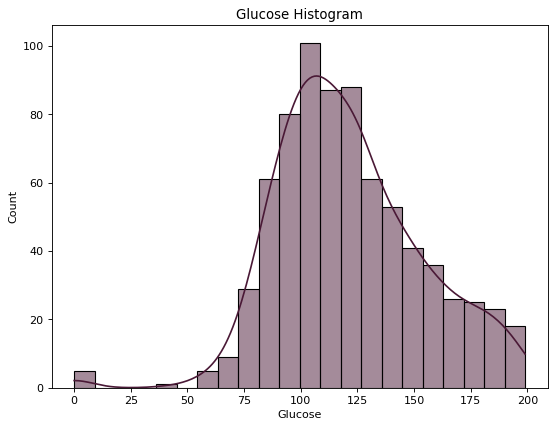

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Glucose', color="#4a1936", kde=True)
plt.title('Glucose Histogram')
plt.show()

In [11]:
df[df['Glucose']<25]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
83,1,0,74,20,23,27.7,0.299,21,0
243,1,0,68,35,0,32.0,0.389,22,0
250,5,0,80,32,0,41.0,0.346,37,1
403,6,0,68,41,0,39.0,0.727,41,1
744,1,0,48,20,0,24.7,0.140,22,0


In [12]:
glucose_mean = np.mean(df['Glucose'])
df['Glucose'] = df['Glucose'].apply(lambda x: 121 if x<25 else x)

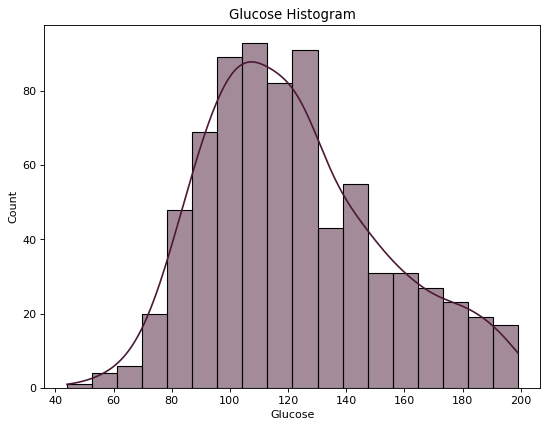

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Glucose', color="#4a1936", kde=True)
plt.title('Glucose Histogram')
plt.show()

### Glucose vs Outcome

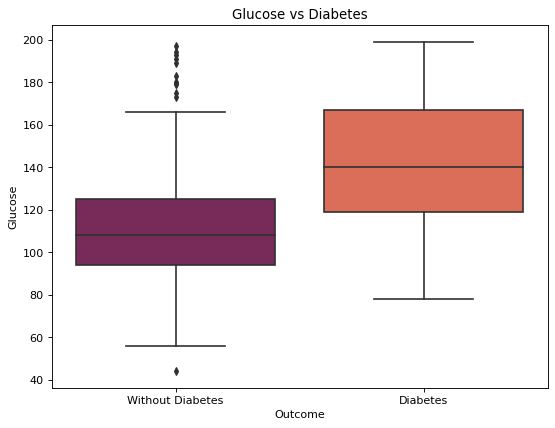

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Glucose', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Glucose vs Diabetes')
plt.show()

Osoby z cukrzycą mają dużo wyższy poziom glukozy we krwi

### Blood Pressure

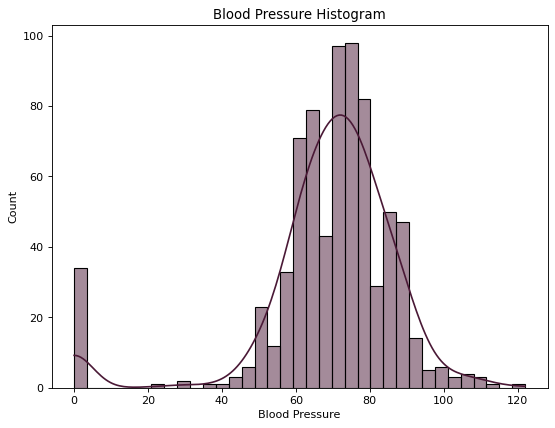

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Blood Pressure', color="#4a1936", kde=True)
plt.title('Blood Pressure Histogram')
plt.show()

In [16]:
np.mean(df['Blood Pressure'])

69.19492656875835

In [17]:
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: 69 if x<10 else x)

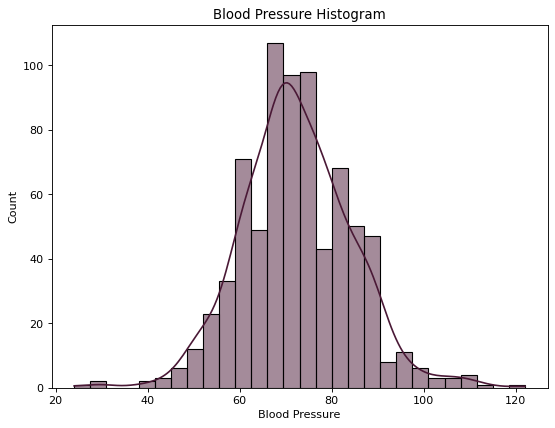

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Blood Pressure', color="#4a1936", kde=True)
plt.title('Blood Pressure Histogram')
plt.show()

### Blood Pressure vs Outcome

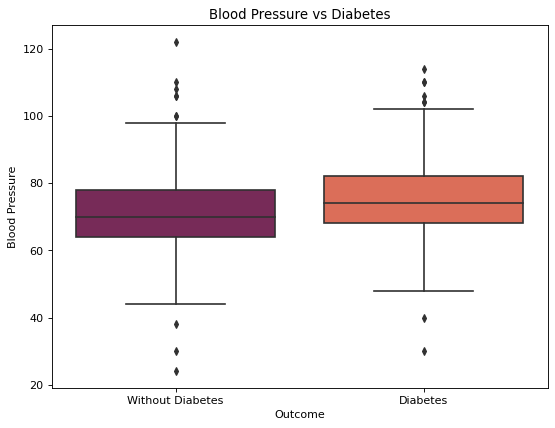

In [19]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Blood Pressure', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Blood Pressure vs Diabetes')
plt.show()

Osoby z cukrzycą mają nieznacznie wyższe ciśnienie krwi

### Skin Thickness

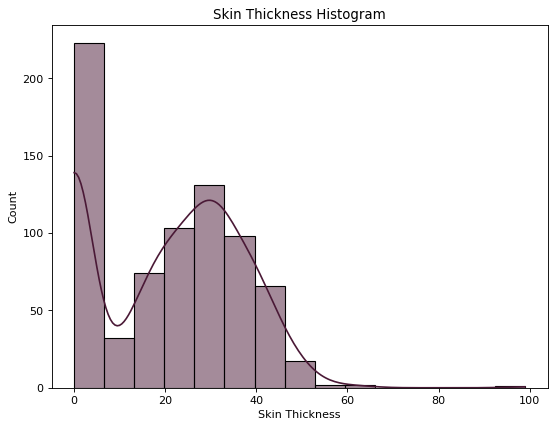

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Skin Thickness', color="#4a1936", kde=True)
plt.title('Skin Thickness Histogram')
plt.show()

### Skin Thickness vs Outcome

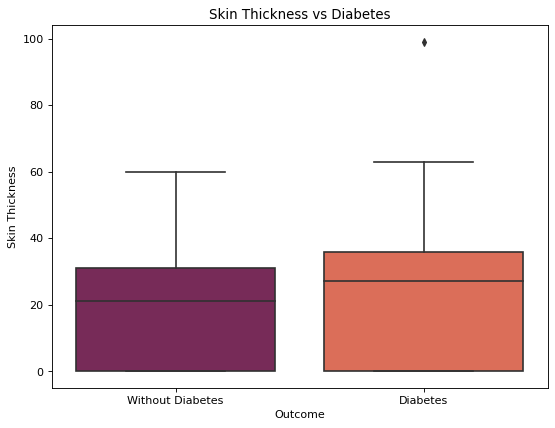

In [21]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Skin Thickness', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Skin Thickness vs Diabetes')
plt.show()

### Insulin

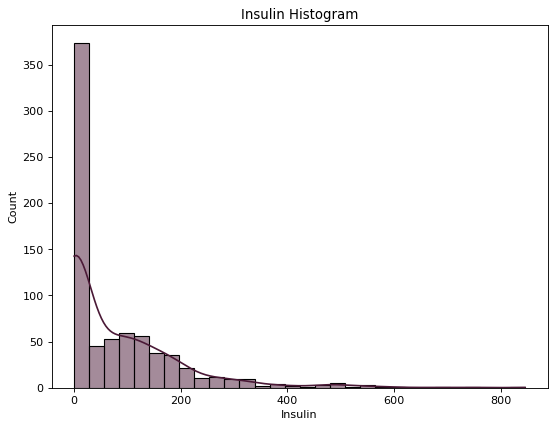

In [22]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Insulin', color="#4a1936", kde=True)
plt.title('Insulin Histogram')
plt.show()

### Insulin vs Outcome

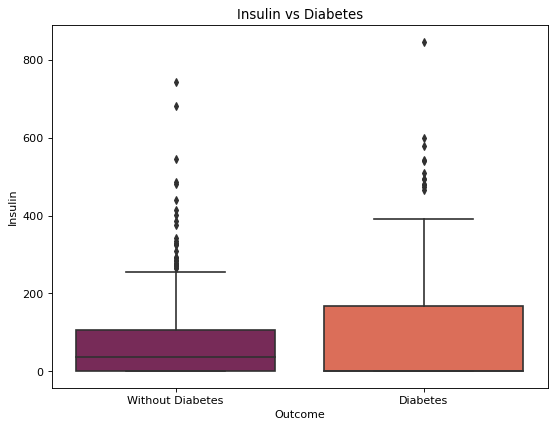

In [23]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Insulin', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Insulin vs Diabetes')
plt.show()

### BMI

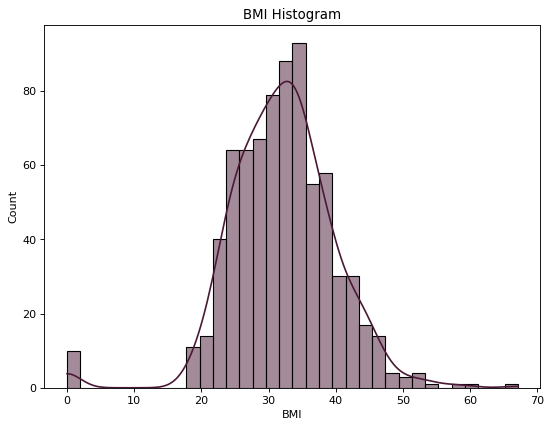

In [24]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='BMI', color="#4a1936", kde=True)
plt.title('BMI Histogram')
plt.show()

In [25]:
np.mean(df['BMI'])

32.06034712950599

In [26]:
df['BMI'] = df['BMI'].apply(lambda x: 32 if x<10 else x)

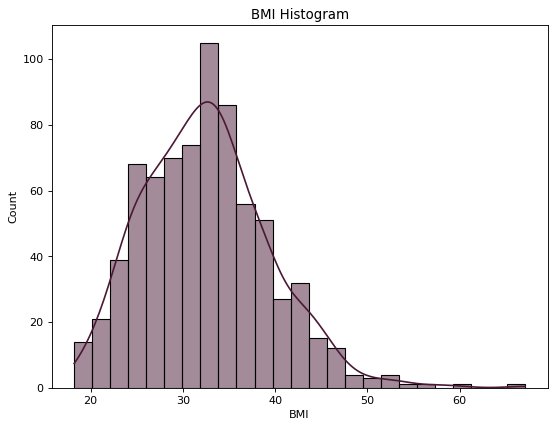

In [27]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='BMI', color="#4a1936", kde=True)
plt.title('BMI Histogram')
plt.show()

### BMI vs Outcome

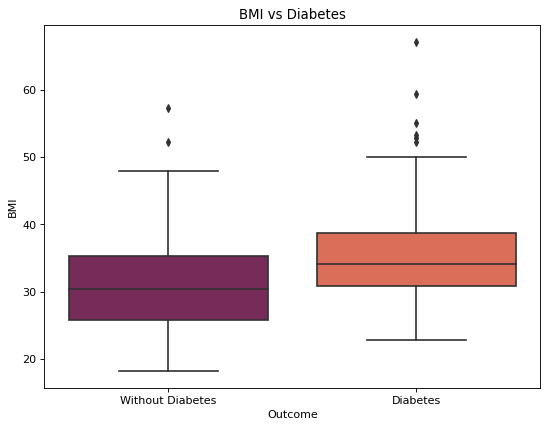

In [28]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'BMI', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('BMI vs Diabetes')
plt.show()

Osoby z cukrzycą mają wyższy poziom BMI

### Diabetes Pedigree Function

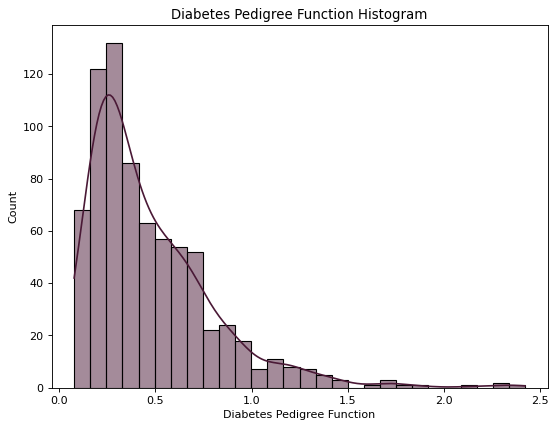

In [29]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Diabetes Pedigree Function', color="#4a1936", kde=True)
plt.title('Diabetes Pedigree Function Histogram')
plt.show()

### Age

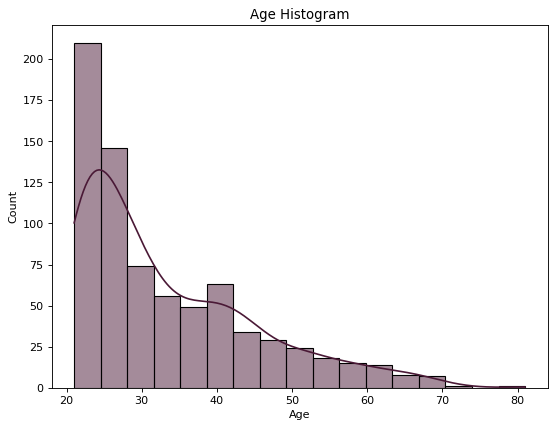

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Age', color="#4a1936", kde=True)
plt.title('Age Histogram')
plt.show()

### Age vs Outcome

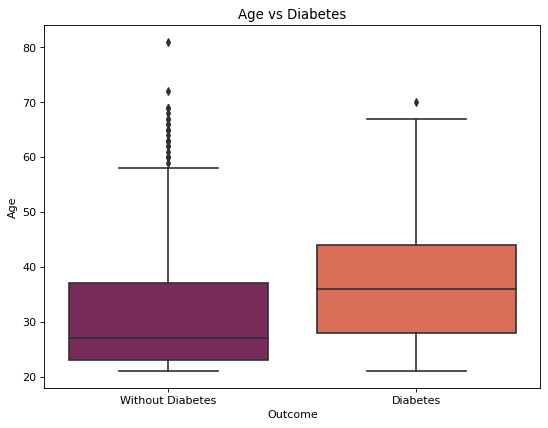

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Age', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Age vs Diabetes')
plt.show()

Osoby starsze, szczególnie powyżej 30 roku życia są bardziej podatne na cukrzycę

### Heatmap

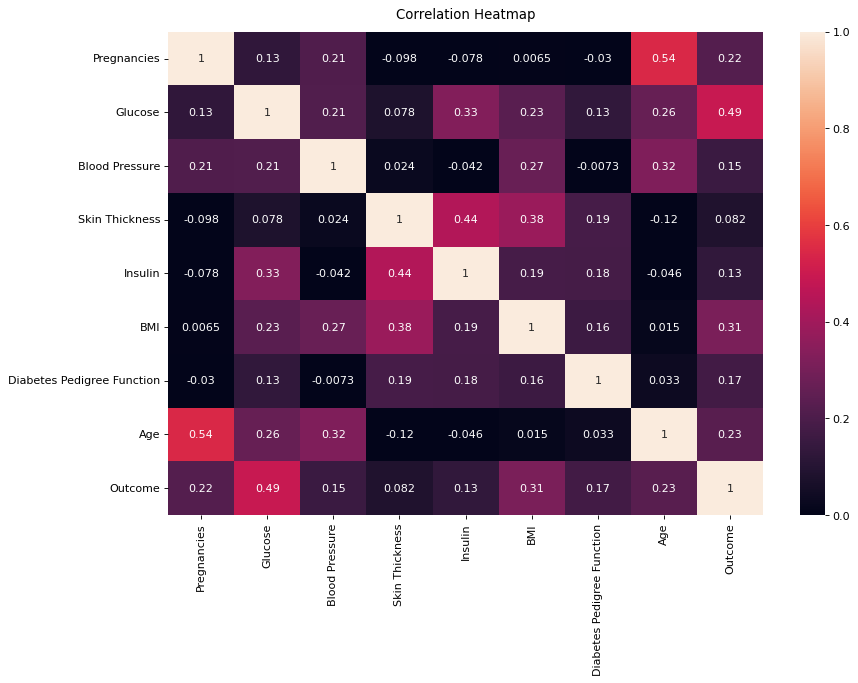

In [32]:
plt.figure(figsize=(12, 8), dpi=80)

heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Najsilniejsza zależność istnieje pomiędzy zmienną 'Outcome', oraz 'Glucose'

# Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [34]:
X = df[['Pregnancies', 'Glucose', 'Blood Pressure', 'BMI', 'Age', 'Diabetes Pedigree Function', 'Insulin']]
y = df['Outcome']
X = StandardScaler().fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [36]:
len(X_train)

599

In [37]:
len(X_test)

150

In [38]:
rfc = RandomForestClassifier(random_state=1)

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [42]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=1)

In [43]:
rf = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=400, random_state=1)

In [46]:
rf.fit(X_train, y_train)
print("Score: " + str(rf.score(X_test, y_test)))

Score: 0.7866666666666666


### Prediction

In [ ]:
arr = np.array([[2, 101, 76, 37, 38, 0.220, 100]])
arr.reshape(-1, 1)

In [ ]:
rf.predict(arr)

# Podsumowanie

1. Cukrzyca występuje częściej u kobiet, które były więcej razy w ciąży
2. Osoby z cukrzycą mają dużo wyższy poziom glukozy we krwi
3. Osoby z cukrzycą mają nieznacznie wyższe ciśnienie krwi
4. Osoby z cukrzycą mają wyższy poziom BMI
5. Osoby starsze, szczególnie powyżej 30 roku życia są bardziej podatne na cukrzycę
6. Najsilniejsza zależność istnieje pomiędzy poziomem glukozy we krwi, a występowaniem cukrzycy

In [55]:
def plot_figure(feature):
    plt.figure(figsize=(8, 6), dpi=80)
    sns.boxplot(data = df, x = 'Outcome', y = feature, palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
    plt.title(feature +' vs Diabetes')
    plt.show()
    plt.clf()
    
features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'BMI', 'Age']

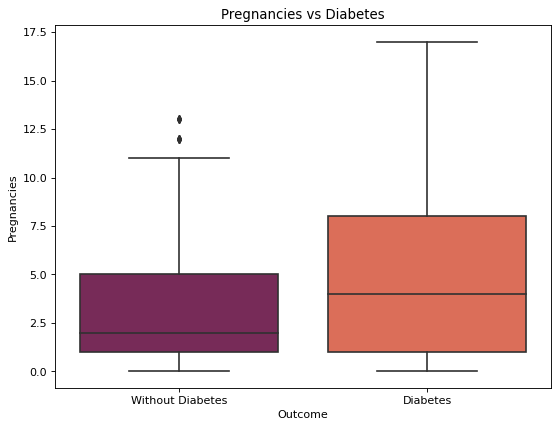

<Figure size 432x288 with 0 Axes>

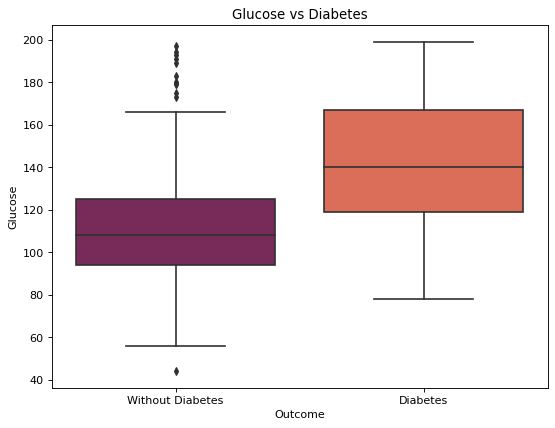

<Figure size 432x288 with 0 Axes>

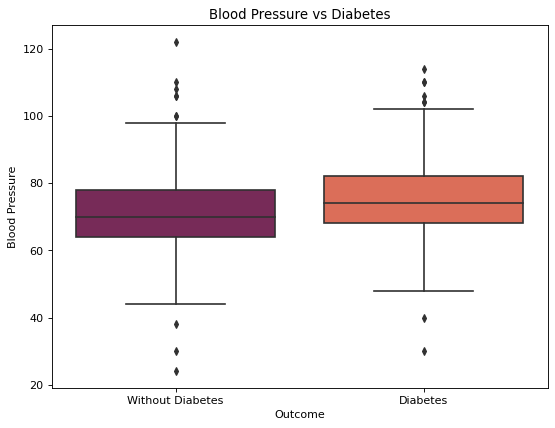

<Figure size 432x288 with 0 Axes>

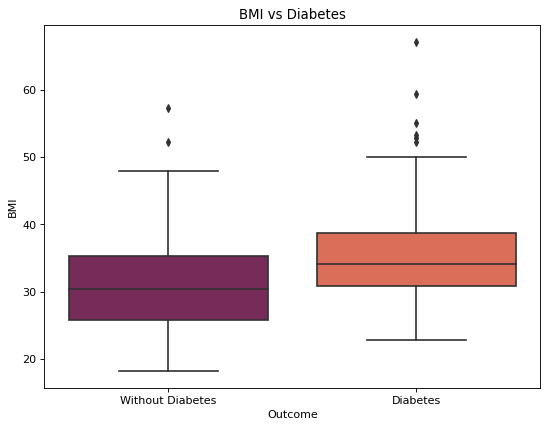

<Figure size 432x288 with 0 Axes>

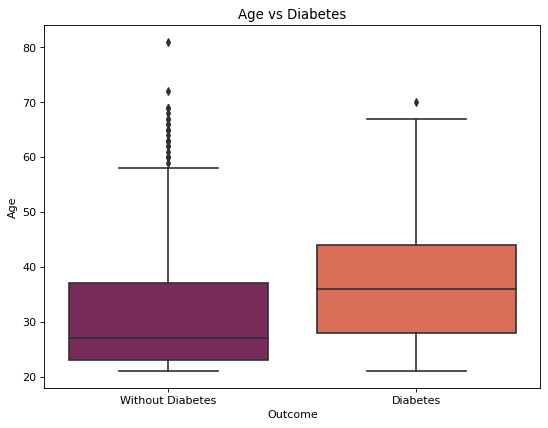

<Figure size 432x288 with 0 Axes>

In [56]:
for feature in features:
    plot_figure(feature)

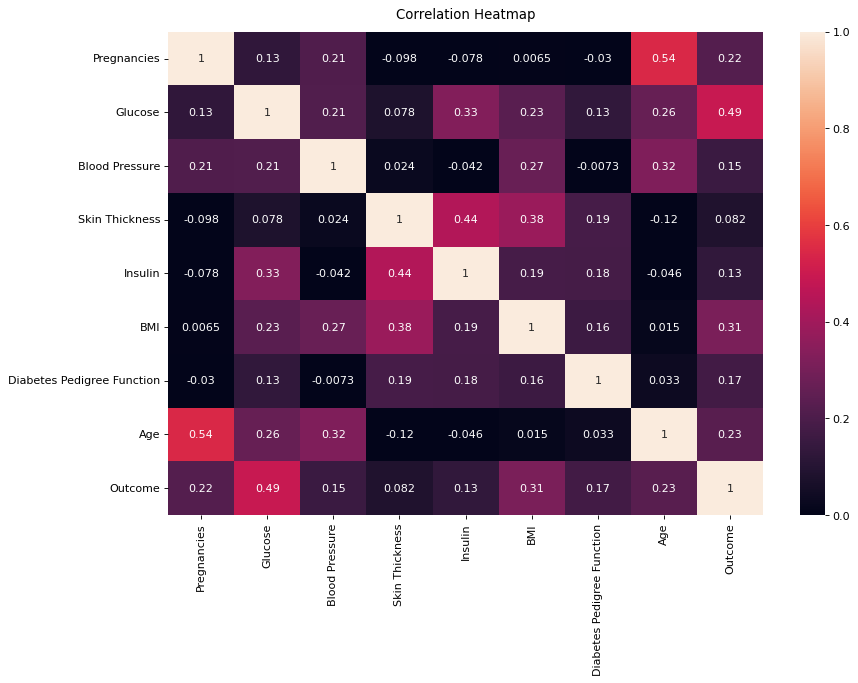

In [57]:
plt.figure(figsize=(12, 8), dpi=80)

heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()